In [46]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [58]:
file_name_all = '/content/gdrive/MyDrive/대학원/연도별/2021년 하/XAI608 Application DL/proposed_project/heloc_dataset_v1.csv'

In [59]:
data_pd_all = pd.read_csv(file_name_all)

In [60]:
data_pd_all = data_pd_all.drop(['label'],axis=1)

KeyError: ignored

In [ ]:
data_pd_all.to_csv('/content/gdrive/MyDrive/대학원/연도별/2021년 하/XAI608 Application DL/proposed_project/valid_data_nolabel.csv')

In [61]:
data_pd_all['RiskPerformance'].value_counts()

Bad     5459
Good    5000
Name: RiskPerformance, dtype: int64

In [62]:
data_pd_all.head().T

,0,1,2,3,4
RiskPerformance,Bad,Bad,Bad,Bad,Bad
ExternalRiskEstimate,55,61,67,66,81
MSinceOldestTradeOpen,144,58,66,169,333
MSinceMostRecentTradeOpen,4,15,5,1,27
AverageMInFile,84,41,24,73,132
NumSatisfactoryTrades,20,2,9,28,12
NumTrades60Ever2DerogPubRec,3,4,0,1,0
NumTrades90Ever2DerogPubRec,0,4,0,1,0
PercentTradesNeverDelq,83,100,100,93,100
MSinceMostRecentDelq,2,-7,-7,76,-7


In [63]:
feature_columns = list(data_pd_all.columns.difference(['RiskPerformance']))

In [64]:
total_x = data_pd_all.loc[:, feature_columns].values
total_y = data_pd_all.loc[:,['RiskPerformance']].values

In [65]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(total_x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [66]:
#principalDf.shape
finalDf = principalDf.copy()
finalDf['RiskPerformance'] = total_y

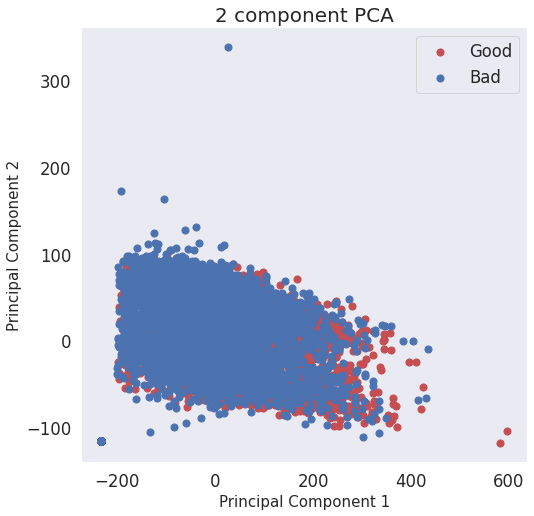

In [67]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Good', 'Bad']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['RiskPerformance'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2).fit_transform(total_x)

In [ ]:
tsne_df = pd.DataFrame({'x': tsne[:, 0], 'y':tsne[:, 1], 'classes':total_y[:, 0]})

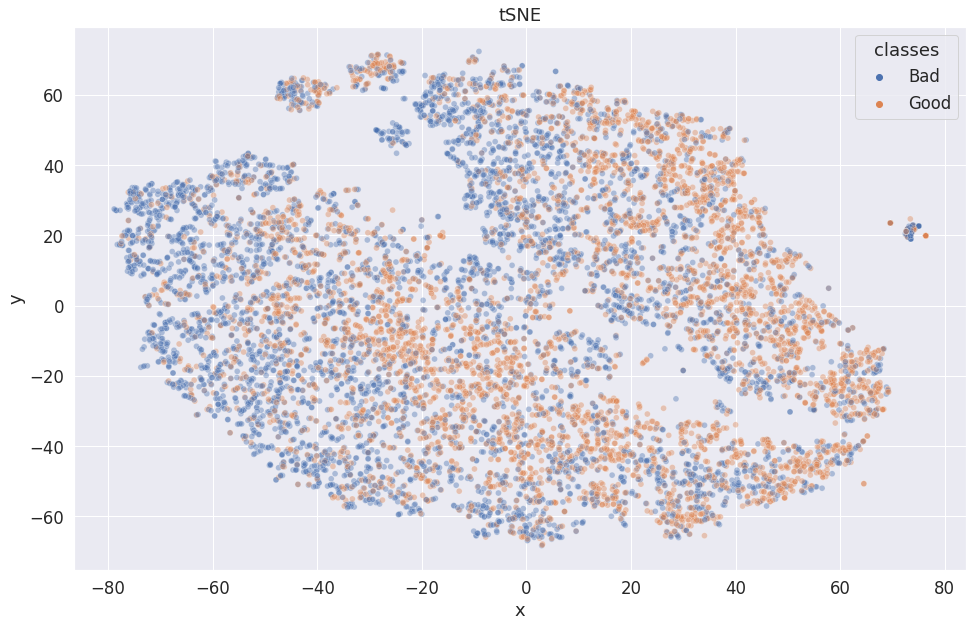

In [ ]:
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x = 'x', y = 'y',
    hue = 'classes',
    #palette = sns.color_palette("Set1", 10),
    data = tsne_df,
    legend = "full",
    alpha = 0.4
)

plt.title("tSNE")
plt.show()


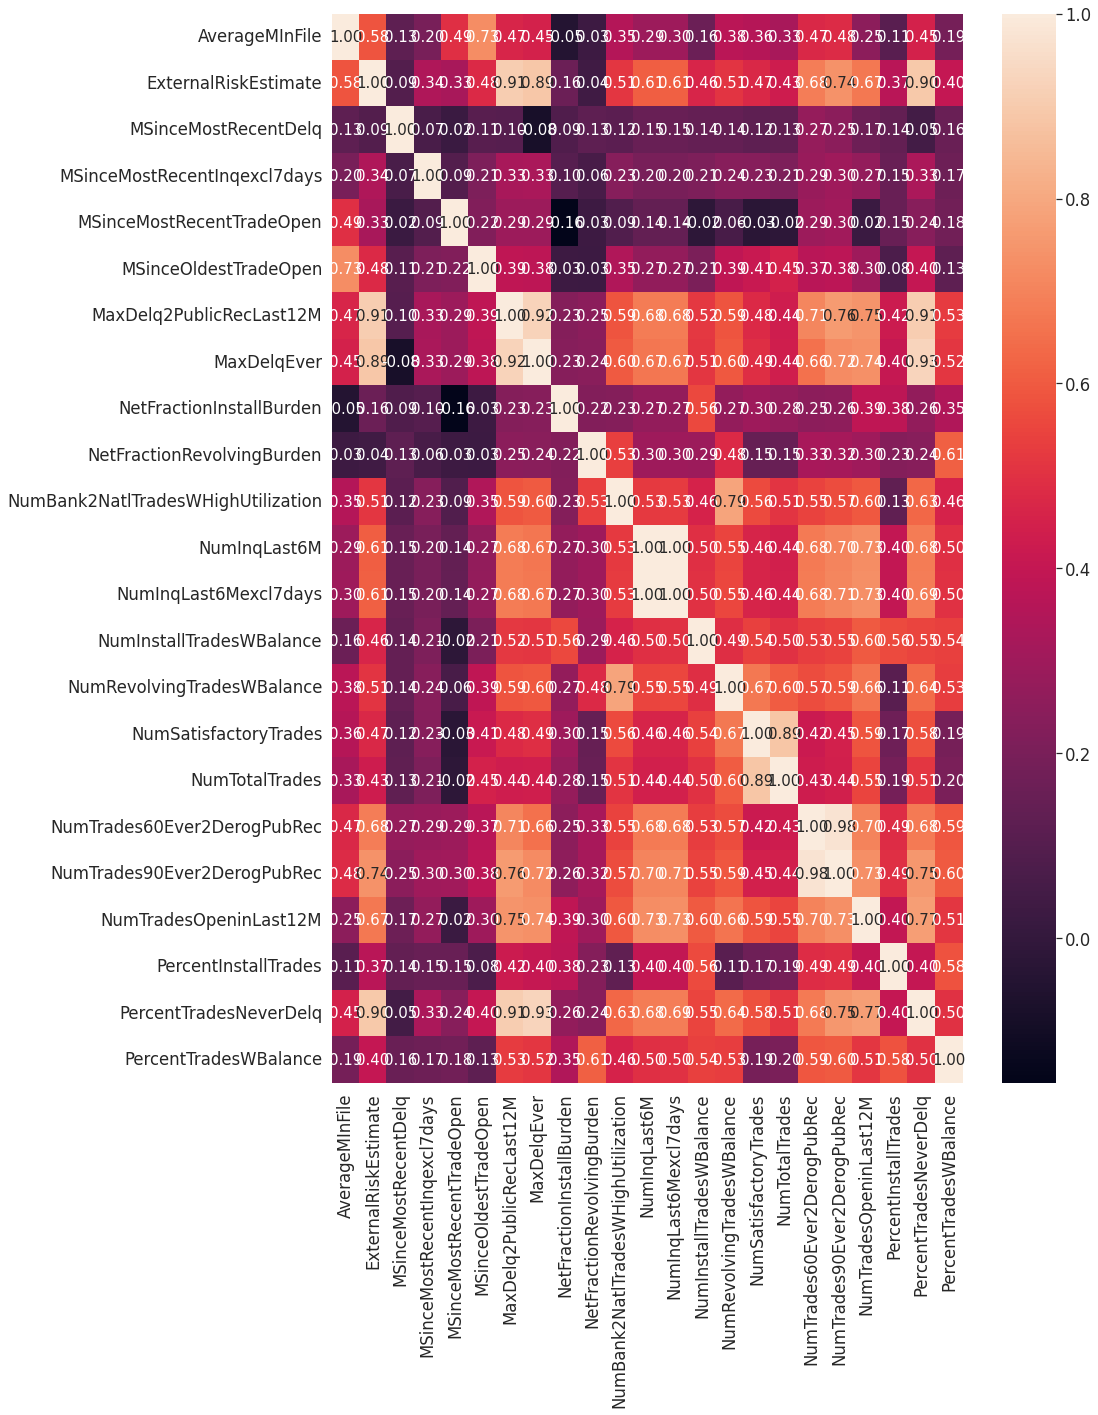

In [ ]:
corr_data = data_pd_all[feature_columns].corr(method='pearson')
fig = plt.figure(figsize = (16,20))
ax=fig.gca()

sns.set(font_scale=1.5)
heat_map_data = sns.heatmap(corr_data.values, annot=True, fmt='.2f', annot_kws={'size':15}, yticklabels=feature_columns, xticklabels=feature_columns, ax=ax)

plt.tight_layout()
plt.show()